<a href="https://colab.research.google.com/github/jijojosevarghese/StellarClassification/blob/main/StellarClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STELLAR CLASSIFICATION

# About the Dataset


1. obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS

2. alpha = Right Ascension angle (at J2000 epoch)

3. delta = Declination angle (at J2000 epoch)

4. u = Ultraviolet filter in the photometric system

5. g = Green filter in the photometric system

6. r = Red filter in the photometric system

7. i = Near Infrared filter in the photometric system

8. z = Infrared filter in the photometric system

9. run_ID = Run Number used to identify the specific scan

10. rerun_ID = Rerun Number to specify how the image was processed

11. cam_col = Camera column to identify the scanline within the run

12. field_ID = Field number to identify each field

13. spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 
14. 2 different observations with the same spec_obj_ID must share the output class)

15. class = object class (galaxy, star or quasar object)

16. redshift = redshift value based on the increase in wavelength

17. plate = plate ID, identifies each plate in SDSS

18. MJD = Modified Julian Date, used to indicate when a given piece of SDSS data 
was taken

19. fiber_ID = fiber ID that identifies the fiber that pointed the light at the 
focal plane in each observation

#  Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Project/Stellar Classification/star_classification.csv')

# EDA

In [ ]:
df[df.duplicated()].size

0

In [ ]:
df.shape

(100000, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
df['fiber_ID'].value_counts()

637    159
105    158
597    158
611    154
321    154
      ... 
746     50
744     49
942     48
768     47
906     45
Name: fiber_ID, Length: 1000, dtype: int64

In [ ]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [ ]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [ ]:
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [ ]:
# Handling Missing Values
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

([<matplotlib.patches.Wedge at 0x7f4196538700>,
 [Text(-0.35086606341172927, 1.1475595869260804, 'GALAXY'),
  Text(-0.3239728189314008, -1.0512095949874325, 'STAR'),
  Text(0.9105454841380407, -0.6171765722350625, 'QSO')],
 [Text(-0.2046718703235087, 0.6694097590402136, '59.4%'),
  Text(-0.17671244668985497, -0.5733870518113268, '21.6%'),
  Text(0.49666117316620395, -0.33664176667367046, '19.0%')])

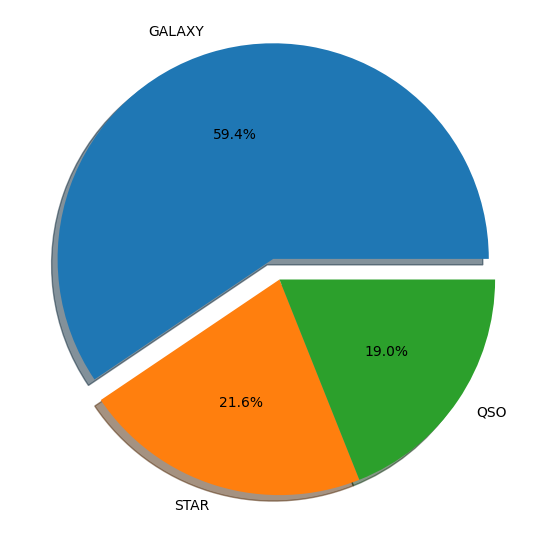

In [ ]:
labels = df['class'].value_counts().keys()
values = df['class'].value_counts().values
explode = (0.1,0,0)
plt.figure(figsize=(13,7))
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')

<Axes: xlabel='class', ylabel='count'>

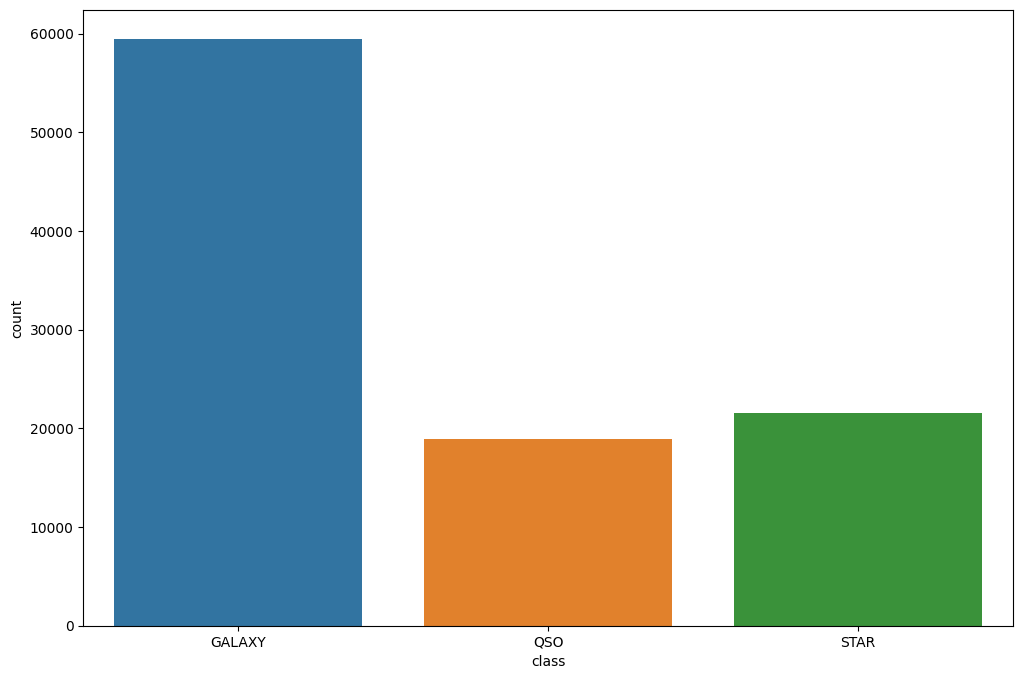

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(x=df['class'])

In [ ]:
# Define plot function
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    plt.show()

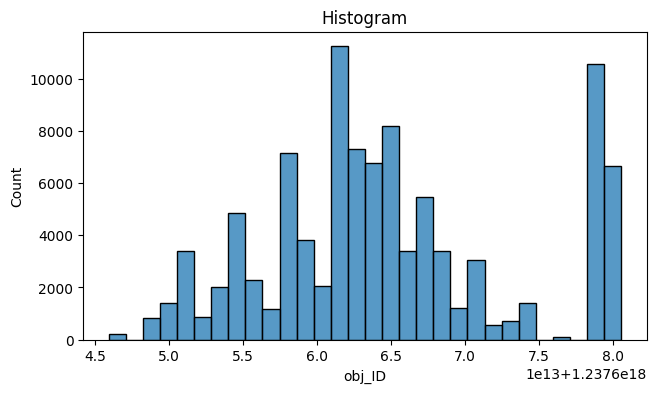

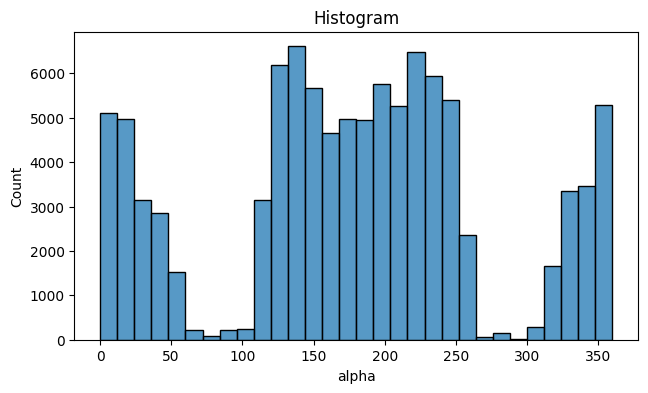

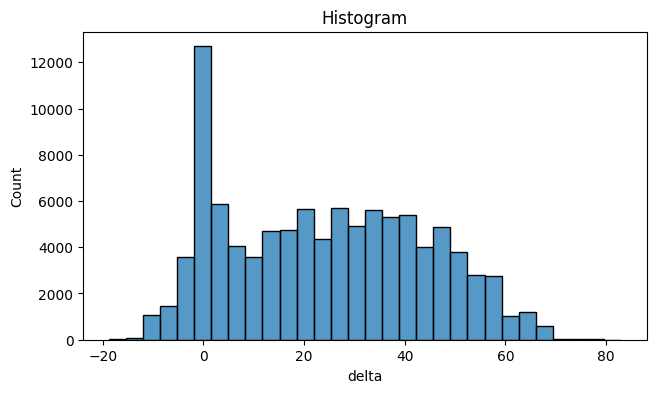

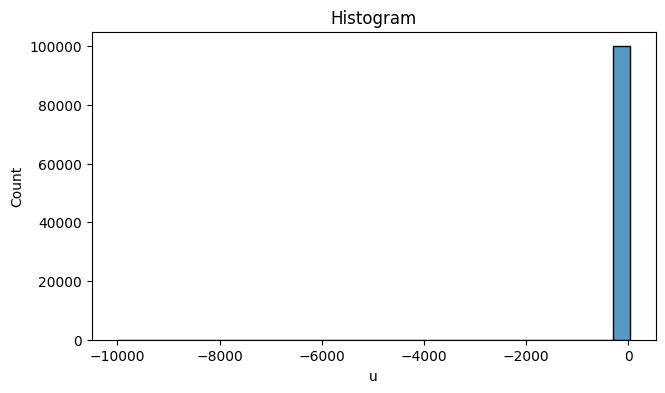

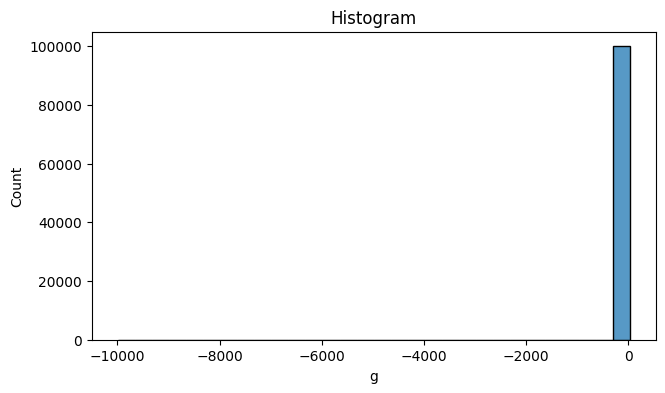

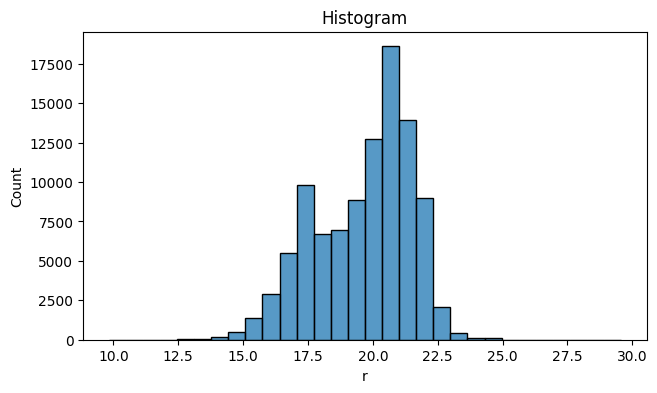

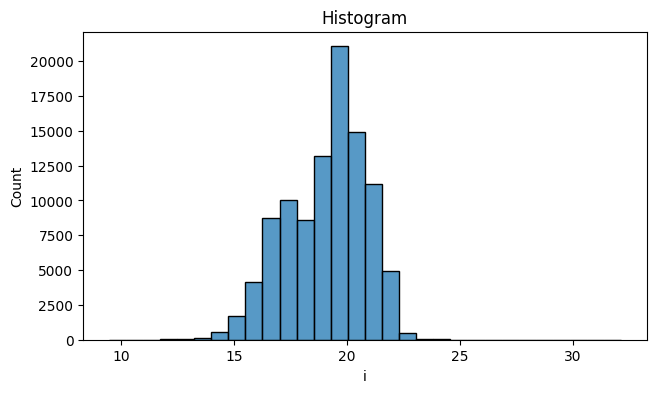

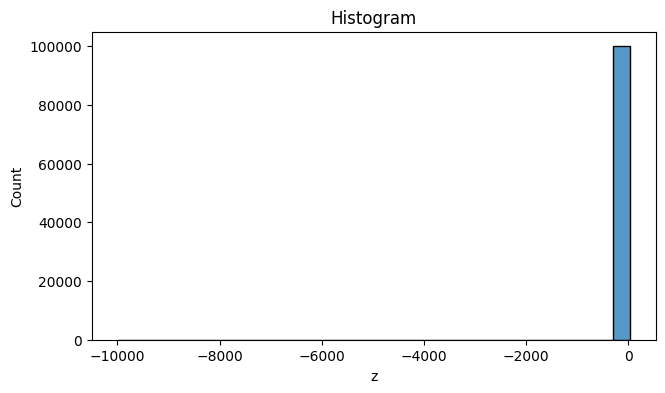

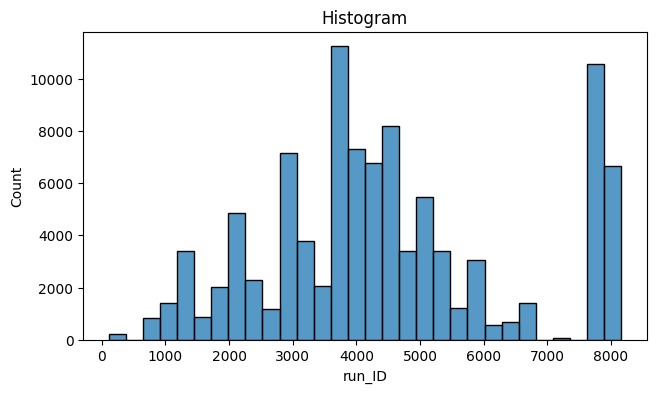

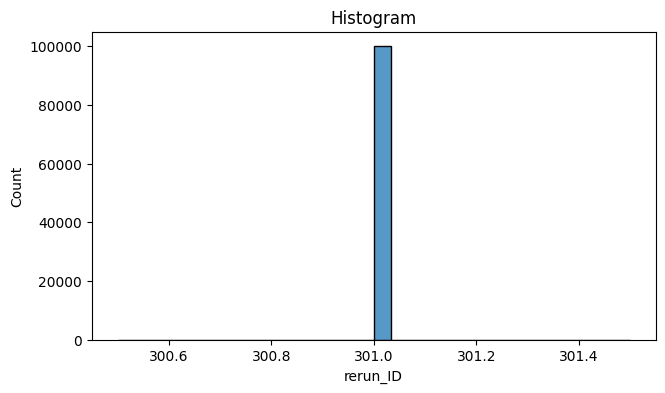

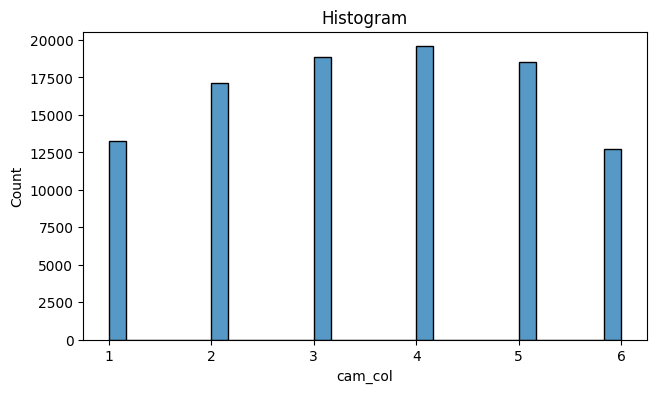

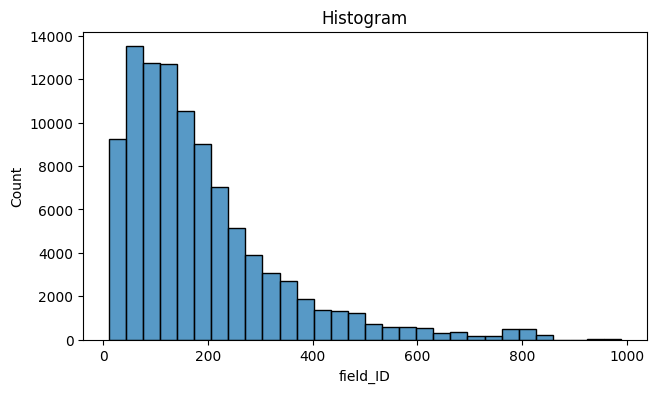

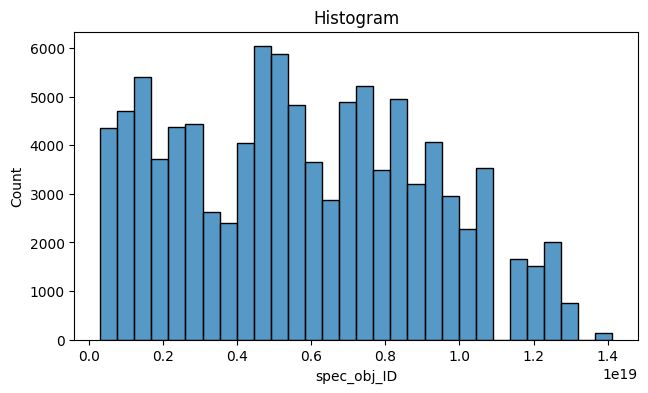

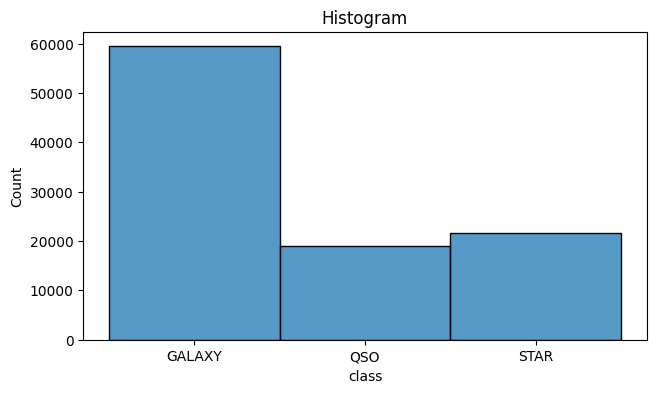

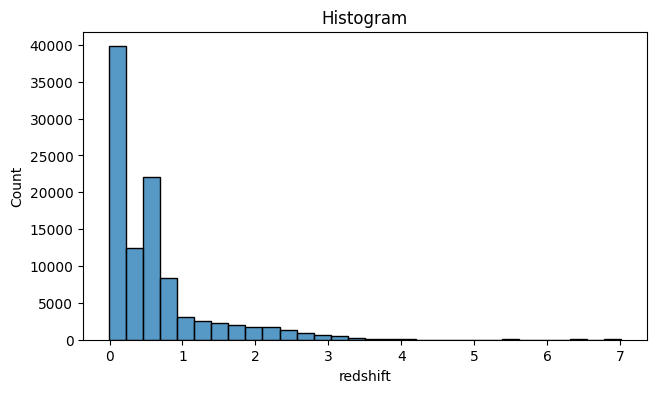

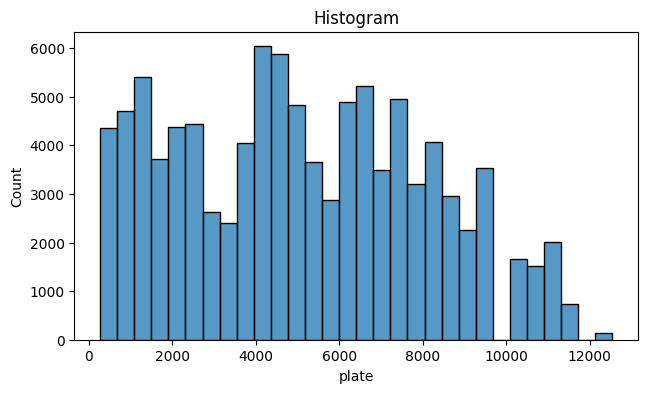

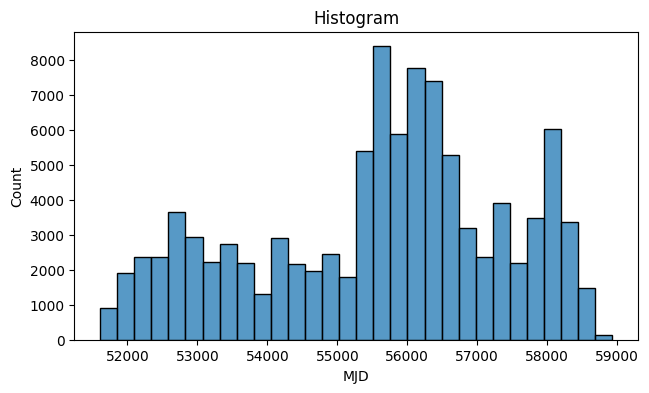

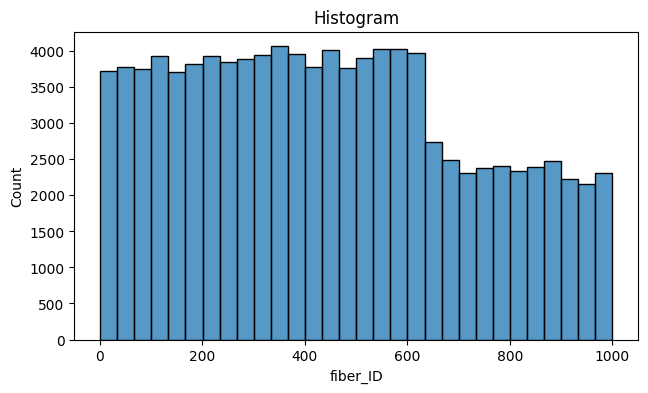

In [ ]:
# Show plot for numeric features
for col in df.columns:
    diagnostic_plots(df, col)
    print("")

<Axes: xlabel='i', ylabel='r'>

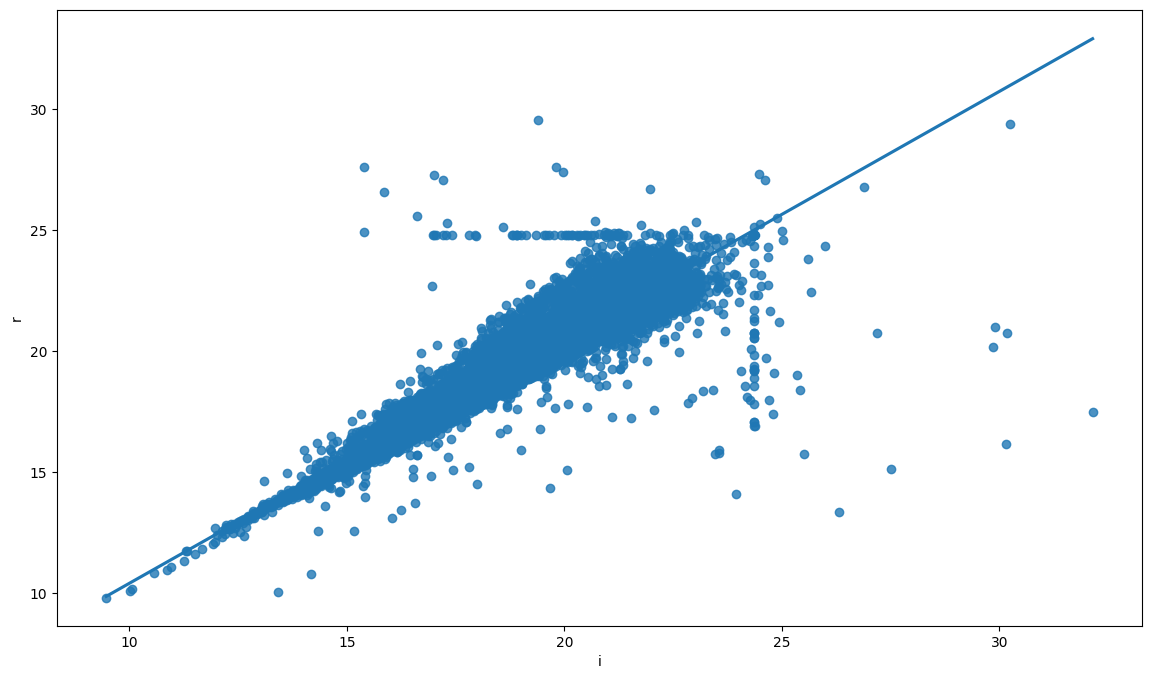

In [17]:
plt.figure(figsize=(14,8))
sns.regplot(x=df.i,y=df.r,data=df)

<Axes: xlabel='u', ylabel='g'>

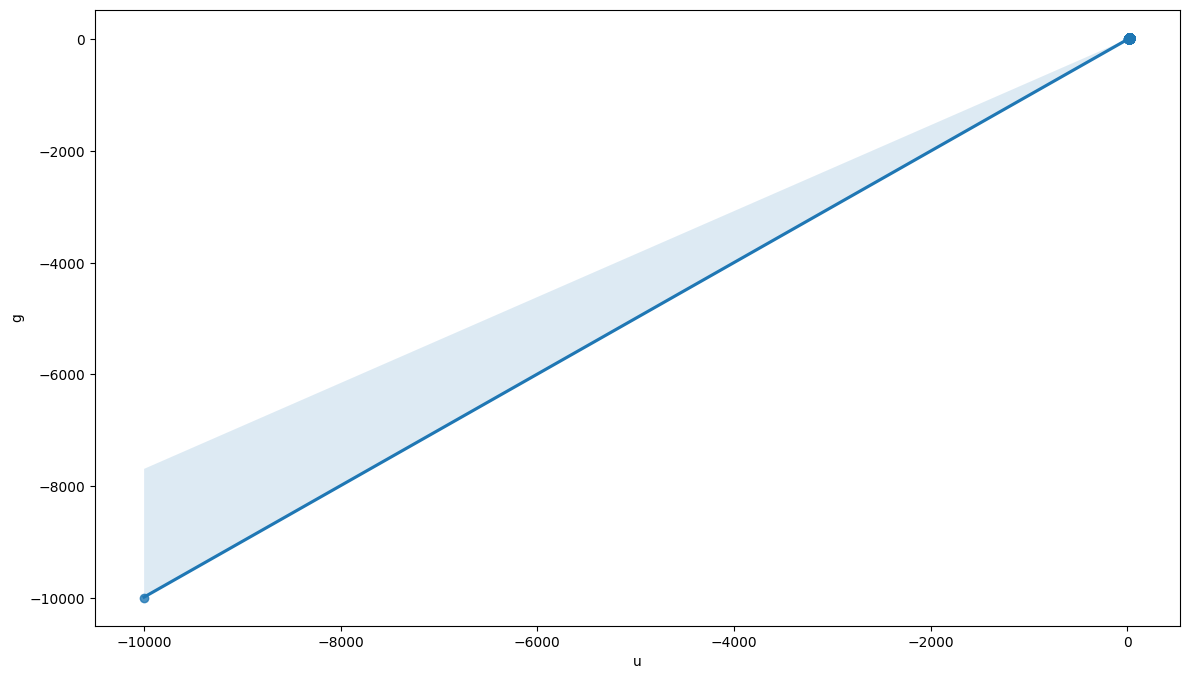

In [21]:
plt.figure(figsize=(14,8))
sns.regplot(x=df.u,y=df.g,data=df)

<Axes: xlabel='g', ylabel='z'>

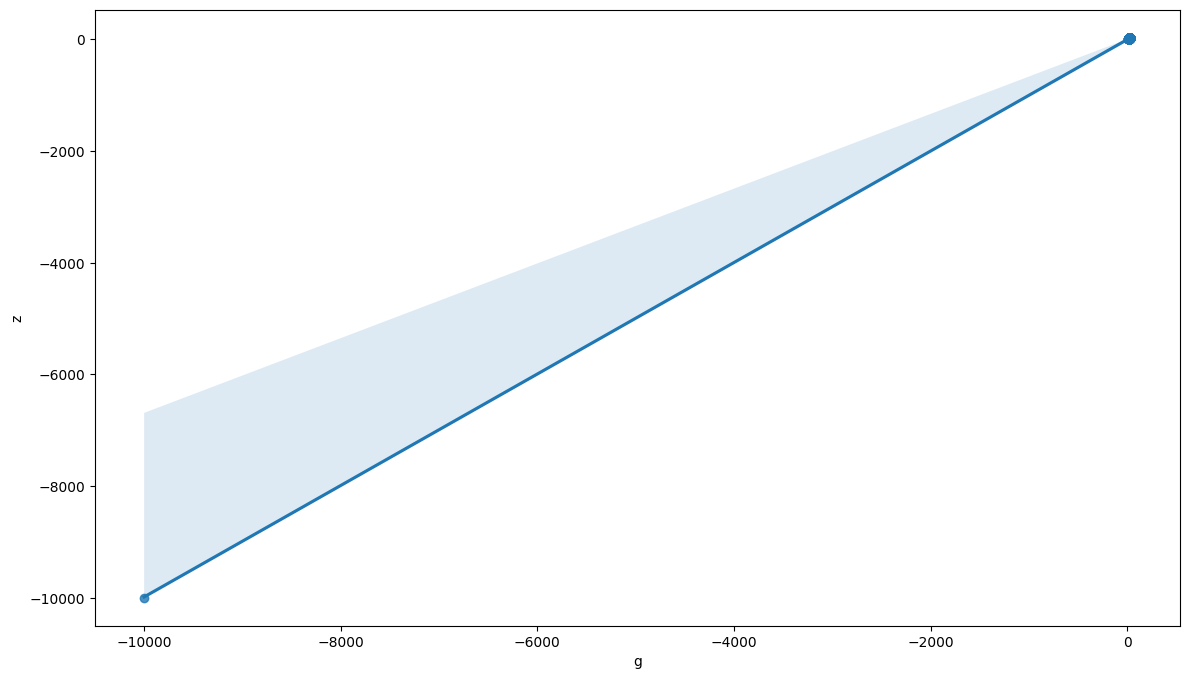

In [22]:
plt.figure(figsize=(14,8))
sns.regplot(x=df.g,y=df.z,data=df)

<Axes: xlabel='u', ylabel='z'>

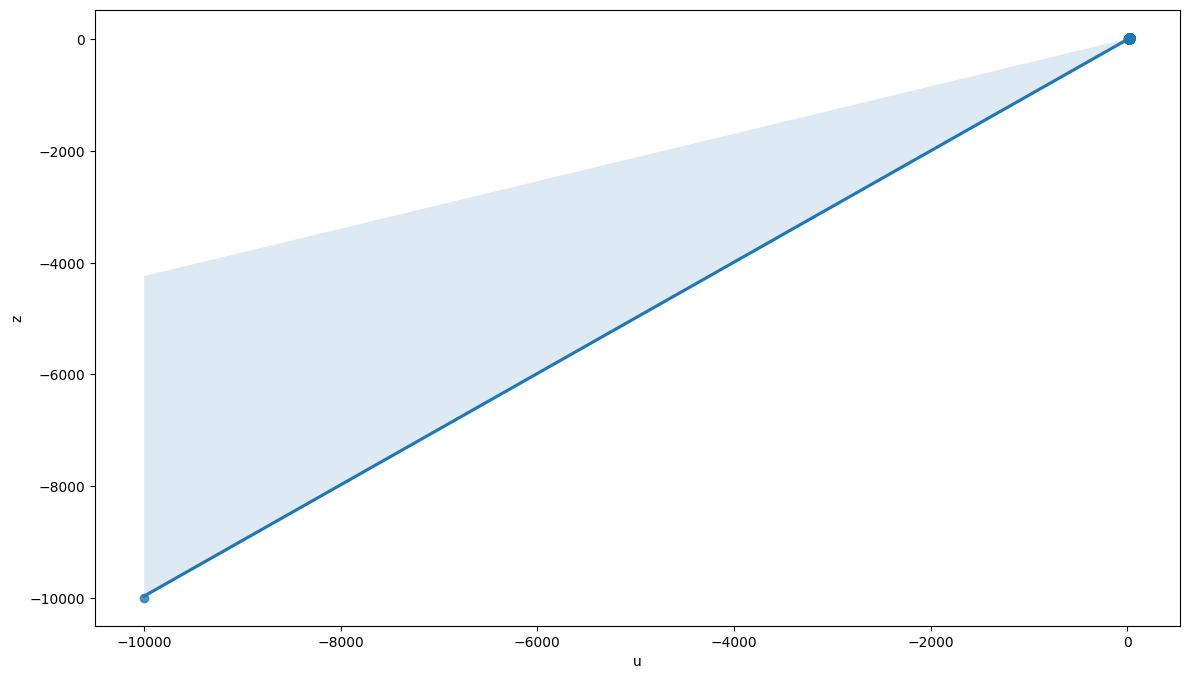

In [23]:
plt.figure(figsize=(14,8))
sns.regplot(x=df.u,y=df.z,data=df)

The features 'r' and 'i' seem to have very high positive correlation between each other due to their high Variance Inflation Factor values and the above regression fit proves that.
Similarly, the feature 'u', 'g' and 'z' have really high positive correlation between themselves.

In [ ]:
def pdf_plotter(df, features, target):
    plt.figure(figsize=(15, 30))
    for (i, feature) in zip(range(len(features)), features):
        plt.subplot(int('{}2{}'.format(len(features), i+1)))
        sns.kdeplot(data=df, x=feature, hue=target, shade=True)
        plt.title(label='PDF of {}'.format(feature), fontsize=10)
        plt.xlabel(xlabel='')
        plt.grid()
        i += 1
    plt.show()

In [ ]:
imp_cols = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']

<ipython-input-21-d0e98e83c421>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=feature, hue=target, shade=True)
<ipython-input-21-d0e98e83c421>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=feature, hue=target, shade=True)
<ipython-input-21-d0e98e83c421>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=feature, hue=target, shade=True)
<ipython-input-21-d0e98e83c421>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=feature, hue=target, shade=True)
<ipy

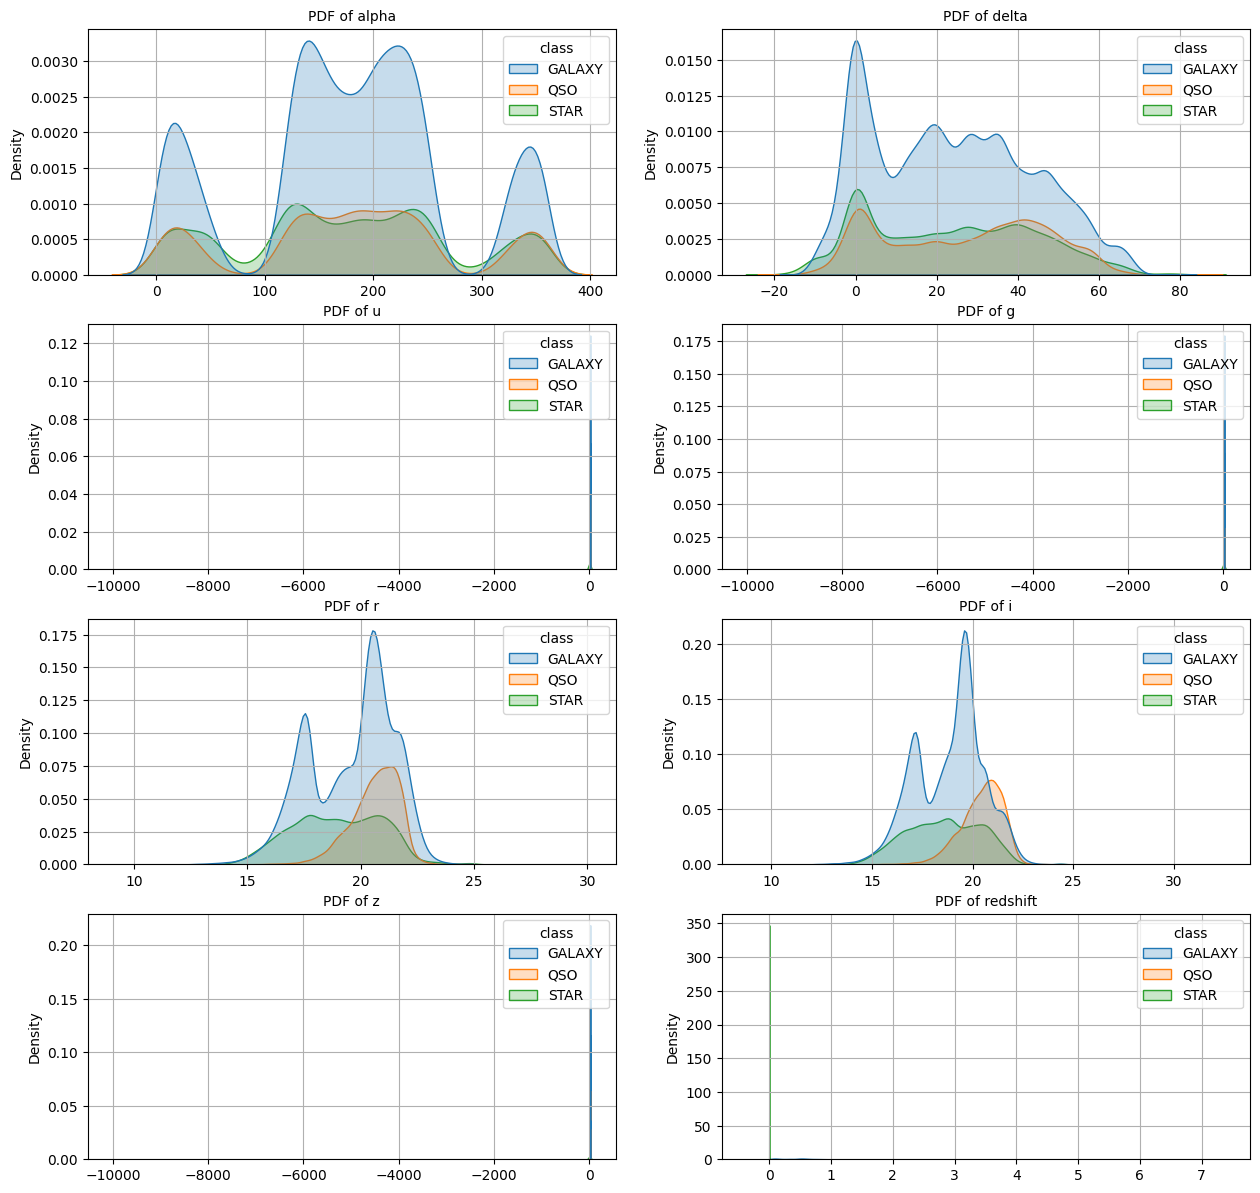

In [ ]:
pdf_plotter(df=df, features=imp_cols, target='class')

In [ ]:
galaxy = df[df['class']=='GALAXY']
star = df[df['class']=='STAR']
qso = df[df['class']=='QSO']

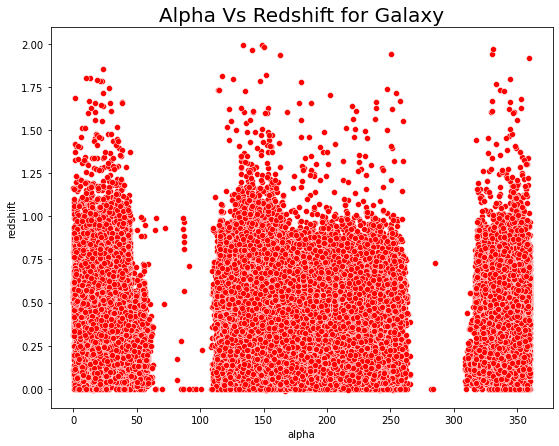

In [ ]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='alpha',y='redshift',data=galaxy,color='r');
plt.title("Alpha Vs Redshift for Galaxy",{'fontsize':20});

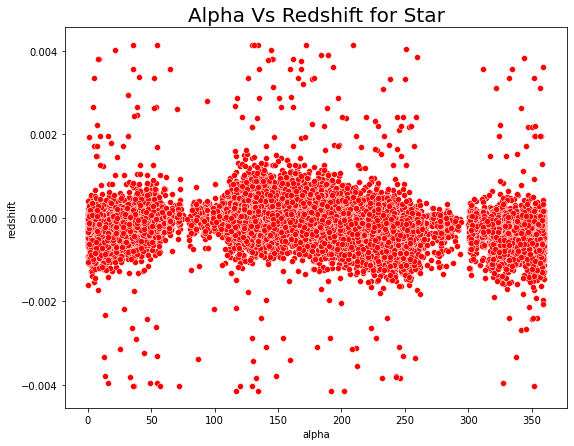

In [ ]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='alpha',y='redshift',data=star,color='r');
plt.title("Alpha Vs Redshift for Star",{'fontsize':20});

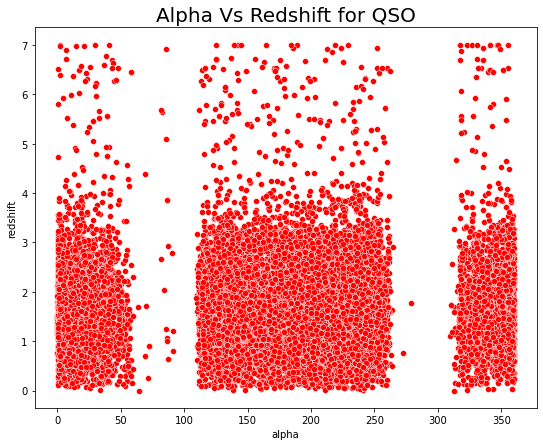

In [ ]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='alpha',y='redshift',data=qso,color='r');
plt.title("Alpha Vs Redshift for QSO",{'fontsize':20});

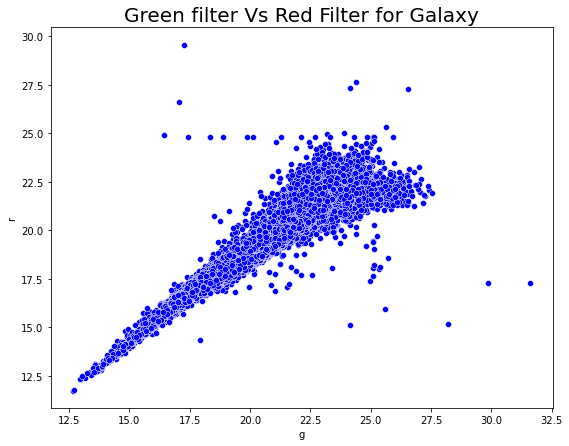

In [ ]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='g',y='r',data=galaxy,color='b');
plt.title("Green filter Vs Red Filter for Galaxy",{'fontsize':20});

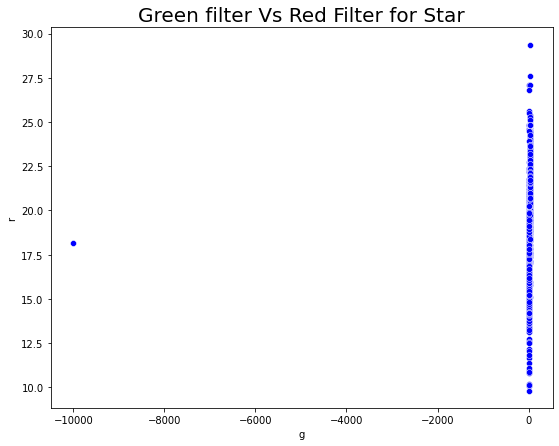

In [ ]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='g',y='r',data=star,color='b');
plt.title("Green filter Vs Red Filter for Star",{'fontsize':20});

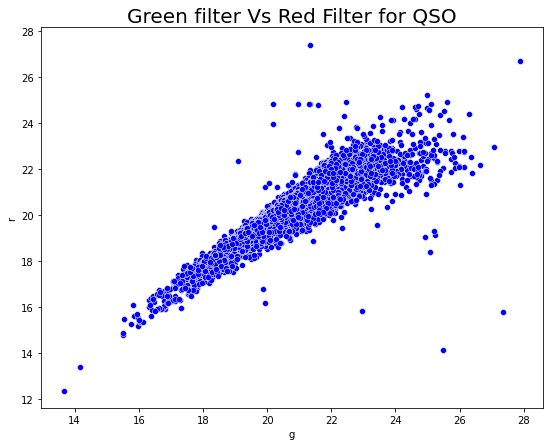

In [ ]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='g',y='r',data=qso,color='b');
plt.title("Green filter Vs Red Filter for QSO",{'fontsize':20});

<AxesSubplot:xlabel='cam_col', ylabel='count'>

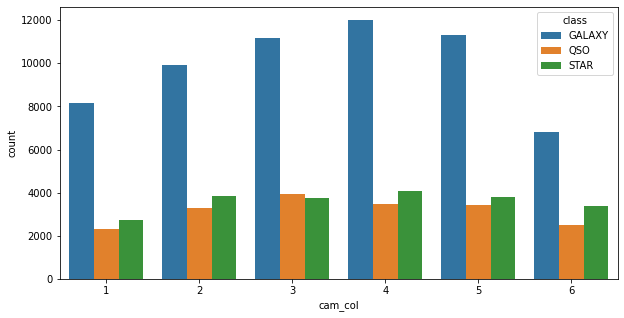

In [ ]:
#Distribution of Class based on Cam_col

plt.figure(figsize=(10, 5))
sns.countplot(x="cam_col", hue="class", data=df)

# DATA PREPROCESSING

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(D):
  vif=pd.DataFrame()
  vif['Variables']=D.columns
  vif['VIF']=[variance_inflation_factor(D.values,i) for i in range(D.shape[1])]
  return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['class']]])

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Variables,VIF
0,obj_ID,5.612779e-10
1,alpha,1.000006e+00
2,delta,1.012774e+00
3,u,1.000901e+00
4,g,1.001558e+00
5,r,1.752373e+00
6,i,1.778624e+00
7,z,1.001432e+00
8,run_ID,1.060856e+00
9,rerun_ID,0.000000e+00


In [ ]:
#Combining filters in photometric system
df['filters']=df['u']+df['g']+df['r']+df['i']+df['z']
data=df.drop(['u','g','r','i','z'],axis=1)
data.head()

,obj_ID,alpha,delta,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID,filters
0,1.237661e+18,135.689107,32.494632,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171,104.50857
1,1.237665e+18,144.826101,31.274185,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427,112.97630
2,1.237661e+18,142.188790,35.582444,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299,106.83356
3,1.237663e+18,338.741038,-0.402828,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775,107.27964
4,1.237680e+18,345.282593,21.183866,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842,85.03665


In [ ]:
data['rerun_ID'].value_counts()

301    100000
Name: rerun_ID, dtype: int64

The feature "rerun_ID" has zero variance so it can simply be eliminated as it isn't useful from the context of our analysis.

In [ ]:
data.drop('rerun_ID',axis=1,inplace=True)

<AxesSubplot:>

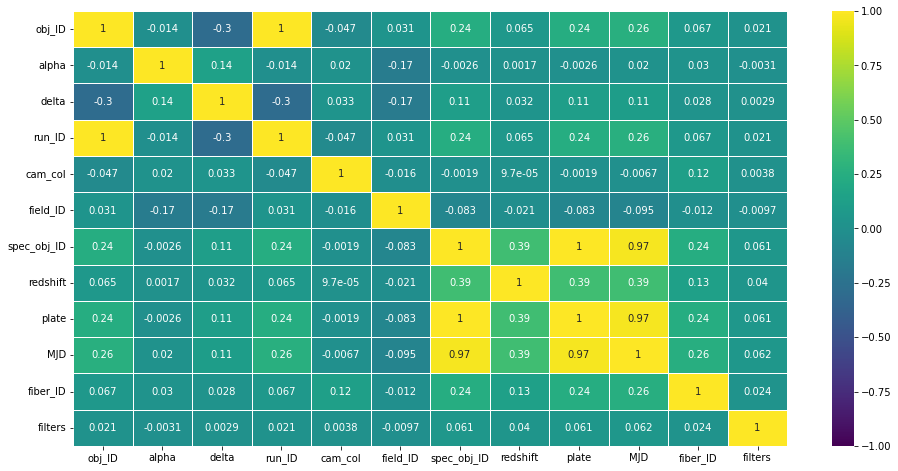

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),annot=True,cmap='viridis',vmin=-1,vmax=1,linewidth=1)

The features 'plate' and 'spec_obj_ID' have perfect positive correlation between each other.So one of them needs to be removed

In [ ]:
data.drop('spec_obj_ID',axis=1,inplace=True)

The features 'run_ID' and 'obj_ID' have perfect positive correlation between each other.So I'll be removing the 'obj_ID' column.

In [ ]:
data.drop('obj_ID',axis=1,inplace=True)

The features 'plate' and 'MJD' have perfect positive correlation between each other.So one of them needs to be removed

In [ ]:
data.drop('MJD',axis=1,inplace=True)

<AxesSubplot:>

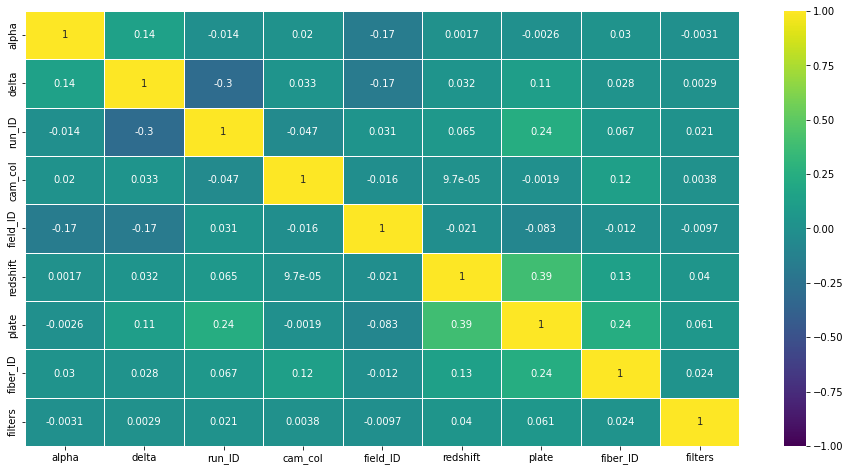

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),annot=True,cmap='viridis',vmin=-1,vmax=1,linewidth=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data['class']=label.fit_transform(data['class'])

In [ ]:
data['class'].value_counts()

0    59445
2    21594
1    18961
Name: class, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alpha     100000 non-null  float64
 1   delta     100000 non-null  float64
 2   run_ID    100000 non-null  int64  
 3   cam_col   100000 non-null  int64  
 4   field_ID  100000 non-null  int64  
 5   class     100000 non-null  int64  
 6   redshift  100000 non-null  float64
 7   plate     100000 non-null  int64  
 8   fiber_ID  100000 non-null  int64  
 9   filters   100000 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 7.6 MB


In [ ]:
data.head()

,alpha,delta,run_ID,cam_col,field_ID,class,redshift,plate,fiber_ID,filters
0,135.689107,32.494632,3606,2,79,0,0.634794,5812,171,104.50857
1,144.826101,31.274185,4518,5,119,0,0.779136,10445,427,112.97630
2,142.188790,35.582444,3606,2,120,0,0.644195,4576,299,106.83356
3,338.741038,-0.402828,4192,3,214,0,0.932346,9149,775,107.27964
4,345.282593,21.183866,8102,3,137,0,0.116123,6121,842,85.03665


Alpha


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


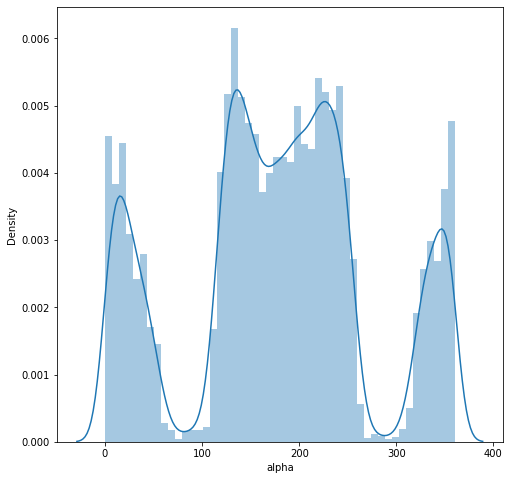

Delta


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


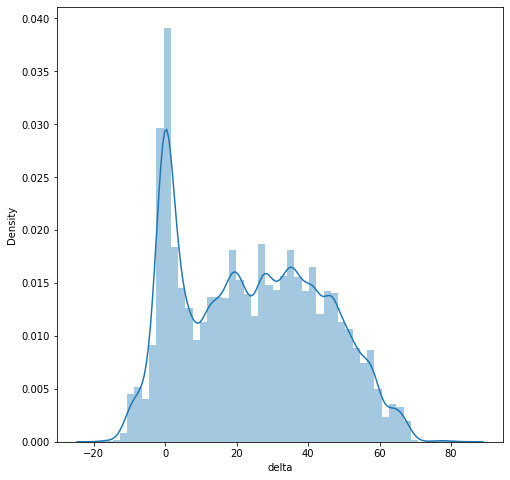

Run_Id


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


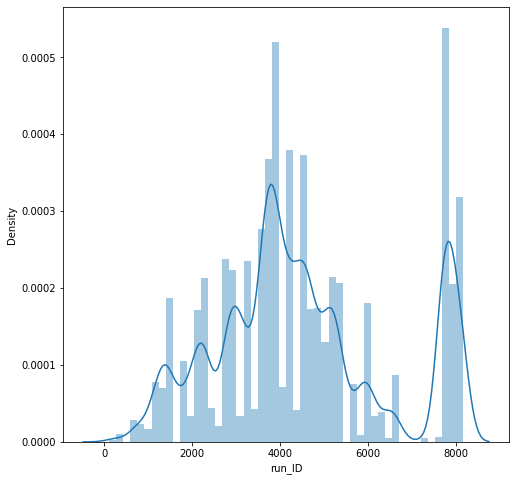

Cam_Col


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


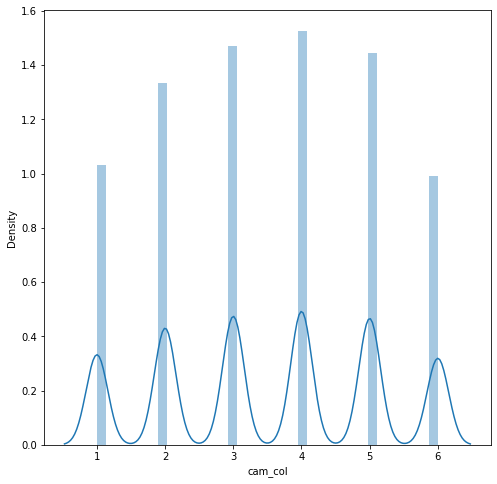

Field_Id


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


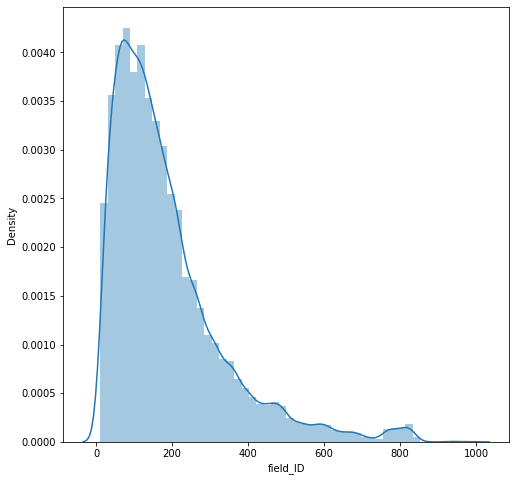

Redshift


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


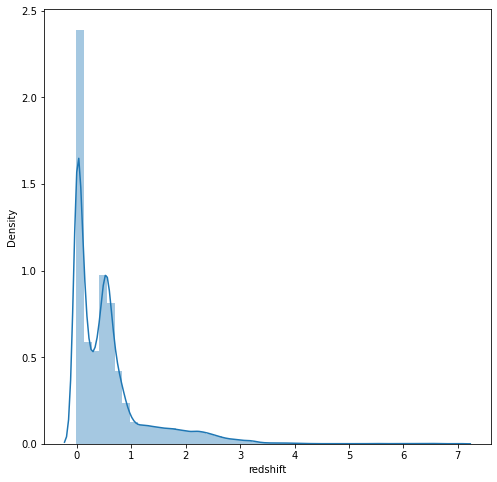

Plate


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


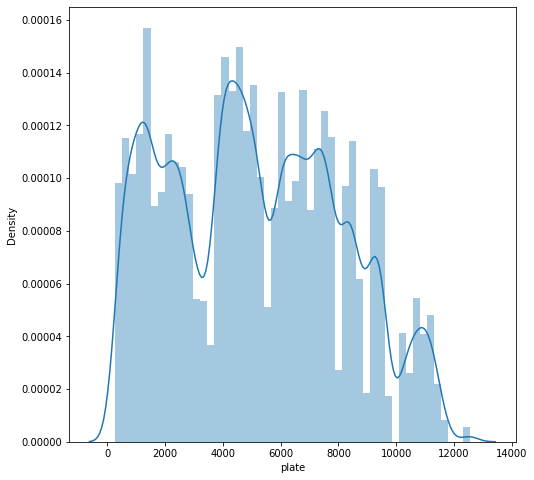

Fiber_Id


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


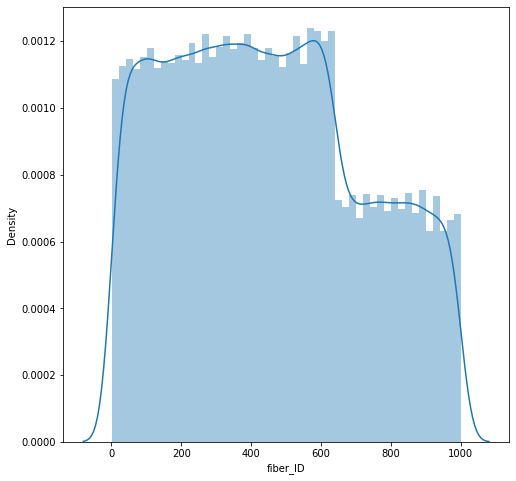

Filters


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


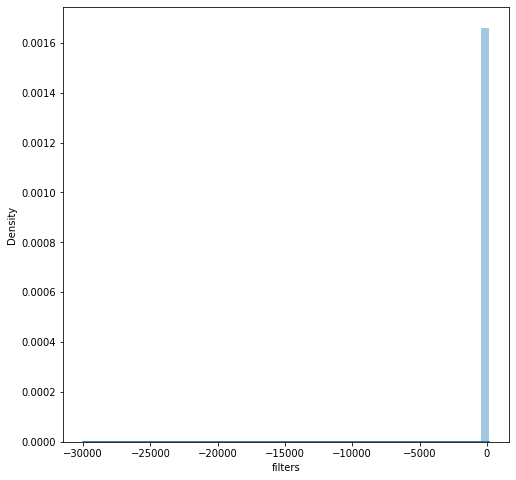

In [ ]:
for col in data.columns:
    if col not in ['class']:
        print(col.title())
        plt.figure(figsize=(8,8))
        sns.distplot(data[col])
        plt.show()

# OUTLIER HANDLING

Alpha


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


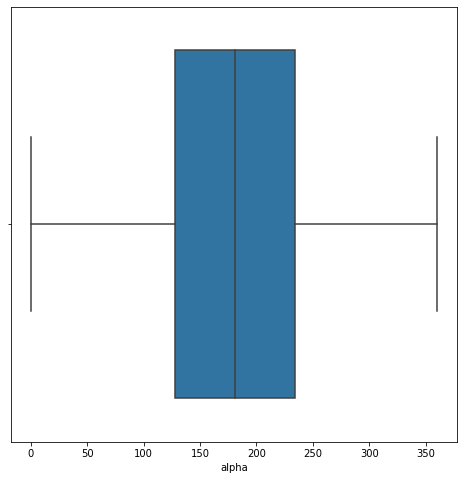

Delta


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


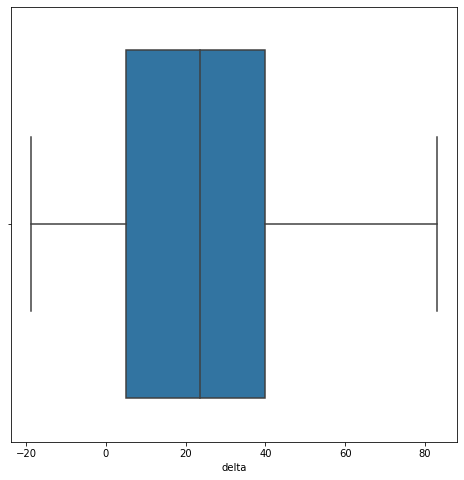

Run_Id


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


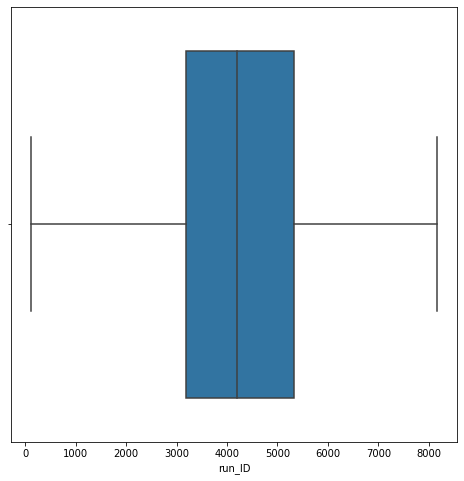

Cam_Col


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


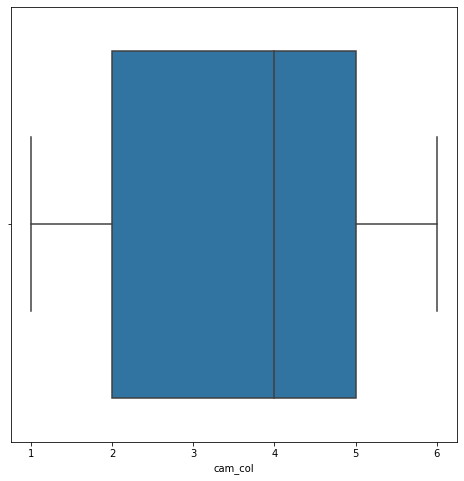

Field_Id


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


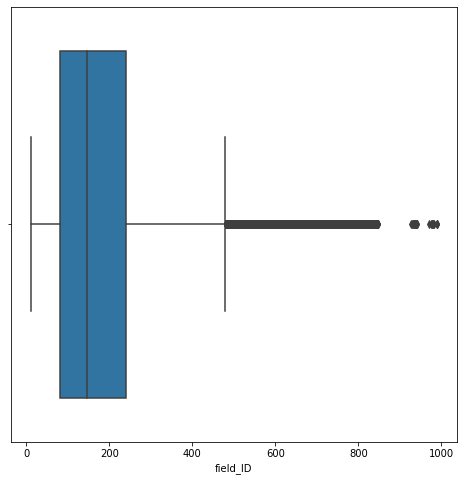

Redshift


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


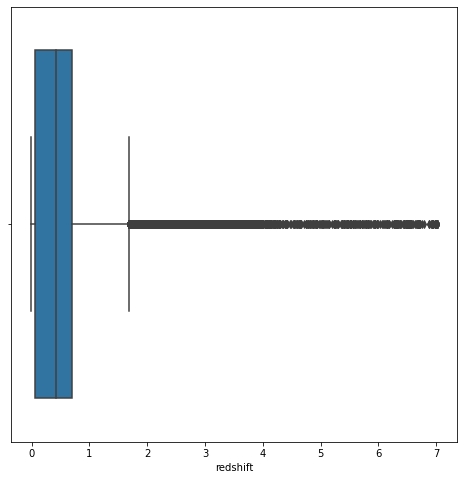

Plate


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


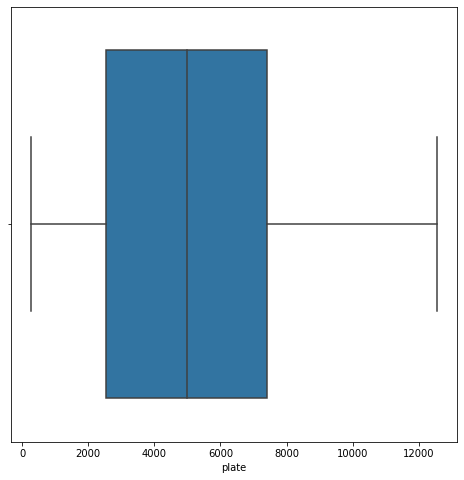

Fiber_Id


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


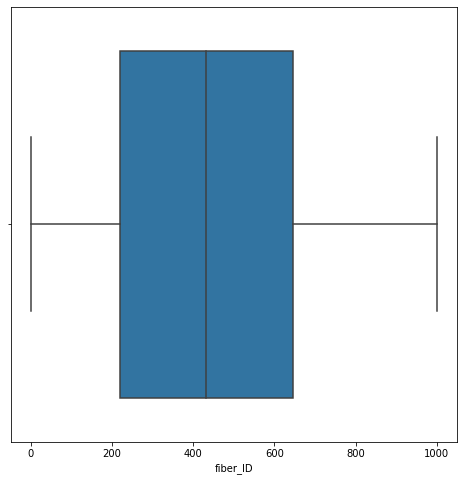

Filters


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


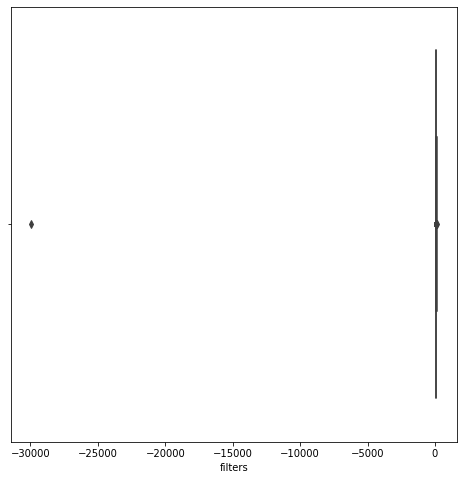

In [ ]:
for col in data.columns:
    if col not in ['class']:
        print(col.title())
        plt.figure(figsize=(8,8))
        sns.boxplot(df[col])
        plt.show()

In [ ]:
#df1.plot(kind='box',layout=(8,8),subplots=True,sharex=True,sharey=False,figsize=(35,35))

In [ ]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1_field_id = df1["field_ID"].quantile(0.25)
q2_field_id = df1["field_ID"].quantile(0.75)

In [ ]:
#finding out the value of Inter Quartile Range
IQR = q2_field_id - q1_field_id


#defining max and min limits
max_limit = q2_field_id + (1.5 * IQR)
min_limit = q1_field_id - (1.5 * IQR)

In [ ]:
df3 = pd.DataFrame(np.where(df1["field_ID"] > max_limit, max_limit, 
         (np.where(df1["field_ID"] < min_limit, min_limit, df1["field_ID"]))), columns=["field_ID"])

field_ID    AxesSubplot(0.125,0.799681;0.0824468x0.0803191)
dtype: object

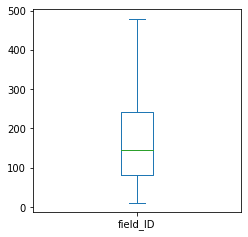

In [ ]:
df3["field_ID"].plot(kind='box',layout=(8,8),subplots=True,sharex=True,sharey=False,figsize=(35,35))

In [ ]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1_redshift = df1["redshift"].quantile(0.25)
q2_redshift = df1["redshift"].quantile(0.75)

In [ ]:
#finding out the value of Inter Quartile Range
IQR = q2_redshift - q1_redshift


#defining max and min limits
max_limit = q2_redshift + (1.5 * IQR)
min_limit = q1_redshift - (1.5 * IQR)

In [ ]:
df4 = pd.DataFrame(np.where(df1["redshift"] > max_limit, max_limit, 
         (np.where(df1["redshift"] < min_limit, min_limit, df1["redshift"]))), columns=["redshift"])

redshift    AxesSubplot(0.125,0.799681;0.0824468x0.0803191)
dtype: object

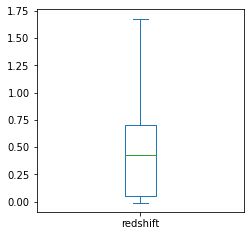

In [ ]:
df4["redshift"].plot(kind='box',layout=(8,8),subplots=True,sharex=True,sharey=False,figsize=(35,35))

In [ ]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1_filters = df1["filters"].quantile(0.25)
q2_filters = df1["filters"].quantile(0.75)

In [ ]:
#finding out the value of Inter Quartile Range
IQR = q2_filters - q1_filters


#defining max and min limits
max_limit = q2_filters + (1.5 * IQR)
min_limit = q1_filters - (1.5 * IQR)

In [ ]:
df5 = pd.DataFrame(np.where(df1["filters"] > max_limit, max_limit, 
         (np.where(df1["filters"] < min_limit, min_limit, df1["filters"]))), columns=["filters"])

filters    AxesSubplot(0.125,0.799681;0.0824468x0.0803191)
dtype: object

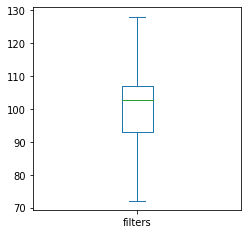

In [ ]:
df5["filters"].plot(kind='box',layout=(8,8),subplots=True,sharex=True,sharey=False,figsize=(35,35))

In [ ]:
df1=df1.drop(['field_ID','redshift','filters'],axis=1)

In [ ]:
data=pd.concat([df1,df3,df4,df5],axis=1)

In [ ]:
data.shape

(100000, 10)

# Splitting the Data

In [ ]:
X = data.drop('class',axis=1)
y = data['class']

# MODEL BUILDING

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
features = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=features)
X.head()

,alpha,delta,run_ID,cam_col,plate,fiber_ID,field_ID,redshift,filters
0,-0.434604,0.425529,-0.445535,-0.952553,0.228633,-1.021342,-0.795018,0.241909,0.483788
1,-0.339921,0.363402,0.018646,0.937920,1.797924,-0.081883,-0.474355,0.518487,1.438373
2,-0.367251,0.582713,-0.445535,-0.952553,-0.190025,-0.551612,-0.466339,0.259922,0.745889
3,1.669523,-1.249105,-0.147278,-0.322395,1.358942,1.195196,0.287219,0.812055,0.796177
4,1.737310,-0.150242,1.842792,-0.322395,0.333297,1.441070,-0.330057,-0.751928,-1.711324


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score

In [ ]:
y_pred_tr = logmodel.predict(X_train)
lr_pred = logmodel.predict(X_test)

In [ ]:
lr_pred

array([0, 0, 2, ..., 2, 0, 0])

In [ ]:
# print the accuracy on training data and test data
print('Accuracy of LogisticRegression on training set: ',accuracy_score(y_train, y_pred_tr))
print('Accuracy of LogisticRegression on test set: ',accuracy_score(y_test, lr_pred))

Accuracy of LogisticRegression on training set:  0.9503285714285714
Accuracy of LogisticRegression on test set:  0.9527


              precision    recall  f1-score   support

           0       0.95      0.97      0.96     17821
           1       0.96      0.84      0.90      5725
           2       0.96      1.00      0.98      6454

    accuracy                           0.95     30000
   macro avg       0.96      0.94      0.94     30000
weighted avg       0.95      0.95      0.95     30000



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



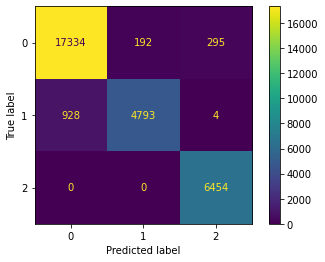

In [ ]:
print(classification_report(y_test,lr_pred))
plot_confusion_matrix(logmodel,X_test,y_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_tr2 = knn.predict(X_train)
knn_pred = knn.predict(X_test)

In [ ]:
knn_pred

array([0, 0, 2, ..., 2, 0, 0])

In [ ]:
# print the accuracy on training data and test data
print('Accuracy of KNeighborsClassifier on training set: ',accuracy_score(y_train, y_pred_tr2))
print('Accuracy of KNeighborsClassifier on test set: ',accuracy_score(y_test, knn_pred))

Accuracy of KNeighborsClassifier on training set:  0.9340571428571428
Accuracy of KNeighborsClassifier on test set:  0.9182333333333333


              precision    recall  f1-score   support

           0       0.91      0.96      0.93     17821
           1       0.97      0.83      0.90      5725
           2       0.91      0.87      0.89      6454

    accuracy                           0.92     30000
   macro avg       0.93      0.89      0.91     30000
weighted avg       0.92      0.92      0.92     30000



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



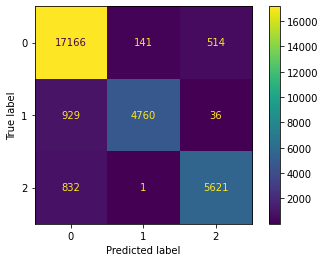

In [ ]:
print(classification_report(y_test,knn_pred))
plot_confusion_matrix(knn,X_test,y_test)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [ ]:
y_pred_tr3 = svm.predict(X_train)
svm_pred = svm.predict(X_test)

In [ ]:
svm_pred

array([0, 0, 2, ..., 2, 0, 0])

In [ ]:
# print the accuracy on training data and test data
print('Accuracy of SVM Classifier on training set: ',accuracy_score(y_train, y_pred_tr3))
print('Accuracy of SVM Classifier on test set: ',accuracy_score(y_test, svm_pred))

Accuracy of SVM Classifier on training set:  0.9544
Accuracy of SVM Classifier on test set:  0.9558


              precision    recall  f1-score   support

           0       0.95      0.97      0.96     17821
           1       0.97      0.85      0.91      5725
           2       0.95      1.00      0.97      6454

    accuracy                           0.96     30000
   macro avg       0.96      0.94      0.95     30000
weighted avg       0.96      0.96      0.96     30000



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



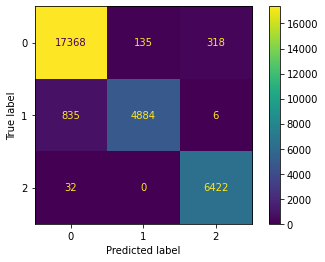

In [ ]:
print(classification_report(y_test,svm_pred))
plot_confusion_matrix(svm,X_test,y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_tr4 = dtree.predict(X_train)
dtree_pred = dtree.predict(X_test)

In [ ]:
dtree_pred

array([0, 0, 0, ..., 2, 0, 0])

In [ ]:
# print the accuracy on training data and test data
print('Accuracy of Decision Tree Classifier on training set: ',accuracy_score(y_train, y_pred_tr4))
print('Accuracy of Decision Tree Classifier on test set: ',accuracy_score(y_test, dtree_pred))

Accuracy of Decision Tree Classifier on training set:  1.0
Accuracy of Decision Tree Classifier on test set:  0.9499


              precision    recall  f1-score   support

           0       0.96      0.96      0.96     17821
           1       0.87      0.88      0.87      5725
           2       1.00      1.00      1.00      6454

    accuracy                           0.95     30000
   macro avg       0.94      0.94      0.94     30000
weighted avg       0.95      0.95      0.95     30000



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



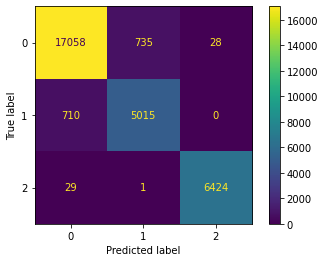

In [ ]:
print(classification_report(y_test,dtree_pred))
plot_confusion_matrix(dtree,X_test,y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_tr5 = rfc.predict(X_train)
rfc_pred = rfc.predict(X_test)

In [ ]:
rfc_pred

array([0, 0, 0, ..., 2, 1, 0])

In [ ]:
# print the accuracy on training data and test data
print('Accuracy of Random Forest Classifier on training set: ',accuracy_score(y_train, y_pred_tr5))
print('Accuracy of Random Forest Classifier on test set: ',accuracy_score(y_test, rfc_pred))

Accuracy of Random Forest Classifier on training set:  1.0
Accuracy of Random Forest Classifier on test set:  0.9709666666666666


              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17821
           1       0.96      0.89      0.92      5725
           2       1.00      1.00      1.00      6454

    accuracy                           0.97     30000
   macro avg       0.97      0.96      0.97     30000
weighted avg       0.97      0.97      0.97     30000



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



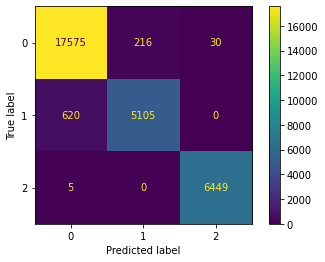

In [ ]:
print(classification_report(y_test,rfc_pred))
plot_confusion_matrix(rfc,X_test,y_test)

In [ ]:
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [ ]:
y_pred_tr6 = abc.predict(X_train)
abc_pred = abc.predict(X_test)

In [ ]:
abc_pred

array([0, 0, 2, ..., 2, 0, 0])

In [ ]:
# print the accuracy on training data and test data
print('Accuracy of AdaBoost Classifier on training set: ',accuracy_score(y_train, y_pred_tr6))
print('Accuracy of AdaBoost Classifier on test set: ',accuracy_score(y_test, abc_pred))

Accuracy of AdaBoost Classifier on training set:  0.7773285714285715
Accuracy of AdaBoost Classifier on test set:  0.7759333333333334


              precision    recall  f1-score   support

           0       0.75      0.93      0.83     17821
           1       0.16      0.04      0.06      5725
           2       0.98      1.00      0.99      6454

    accuracy                           0.78     30000
   macro avg       0.63      0.66      0.63     30000
weighted avg       0.69      0.78      0.72     30000



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



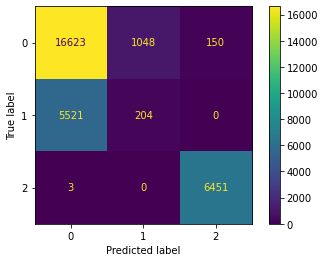

In [ ]:
print(classification_report(y_test,abc_pred))
plot_confusion_matrix(abc,X_test,y_test)

In [ ]:
bag = BaggingClassifier()
bag.fit(X_train,y_train)

BaggingClassifier()

In [ ]:
y_pred_tr7 = bag.predict(X_train)
bag_pred = bag.predict(X_test)

In [ ]:
bag_pred

array([0, 0, 0, ..., 2, 1, 0])

In [ ]:
# print the accuracy on training data and test data
print('Accuracy of BaggingClassifier on training set: ',accuracy_score(y_train, y_pred_tr7))
print('Accuracy of BaggingClassifier on test set: ',accuracy_score(y_test, bag_pred))

Accuracy of BaggingClassifier on training set:  0.9954142857142857
Accuracy of BaggingClassifier on test set:  0.9679


              precision    recall  f1-score   support

           0       0.96      0.98      0.97     17821
           1       0.95      0.88      0.92      5725
           2       1.00      1.00      1.00      6454

    accuracy                           0.97     30000
   macro avg       0.97      0.96      0.96     30000
weighted avg       0.97      0.97      0.97     30000



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



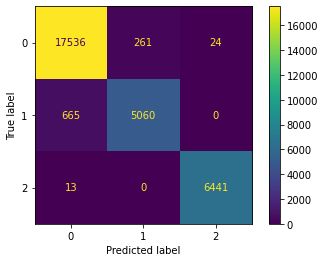

In [ ]:
print(classification_report(y_test,bag_pred))
plot_confusion_matrix(bag,X_test,y_test)

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred_tr8 = gbc.predict(X_train)
gbc_pred = gbc.predict(X_test)

In [ ]:
gbc_pred

array([0, 0, 0, ..., 2, 1, 0])

In [ ]:
# print the accuracy on training data and test data
print('Accuracy of GradientBoostingClassifier on training set: ',accuracy_score(y_train, y_pred_tr8))
print('Accuracy of GradientBoostingClassifier on test set: ',accuracy_score(y_test, gbc_pred))

Accuracy of GradientBoostingClassifier on training set:  0.9694571428571429
Accuracy of GradientBoostingClassifier on test set:  0.9690666666666666


              precision    recall  f1-score   support

           0       0.96      0.99      0.97     17821
           1       0.96      0.88      0.92      5725
           2       1.00      1.00      1.00      6454

    accuracy                           0.97     30000
   macro avg       0.97      0.95      0.96     30000
weighted avg       0.97      0.97      0.97     30000



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



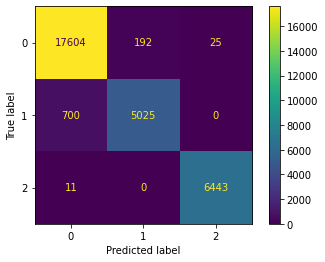

In [ ]:
print(classification_report(y_test,gbc_pred))
plot_confusion_matrix(gbc,X_test,y_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred_tr9 = gnb.predict(X_train)
gnb_pred = gnb.predict(X_test)

In [ ]:
gnb_pred

array([0, 0, 2, ..., 2, 0, 0])

In [ ]:
# print the accuracy on training data and test data
print('Accuracy of GaussianNB on training set: ',accuracy_score(y_train, y_pred_tr9))
print('Accuracy of GaussianNB on test set: ',accuracy_score(y_test, gnb_pred))

Accuracy of GaussianNB on training set:  0.9274428571428571
Accuracy of GaussianNB on test set:  0.9273666666666667


              precision    recall  f1-score   support

           0       0.94      0.93      0.94     17821
           1       0.82      0.84      0.83      5725
           2       0.98      0.99      0.98      6454

    accuracy                           0.93     30000
   macro avg       0.91      0.92      0.92     30000
weighted avg       0.93      0.93      0.93     30000



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



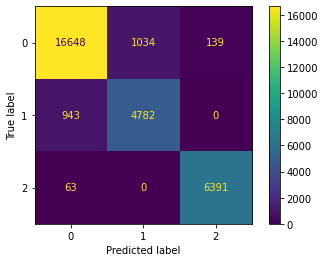

In [ ]:
print(classification_report(y_test,gnb_pred))
plot_confusion_matrix(gnb,X_test,y_test)

In [ ]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)

BernoulliNB()

In [ ]:
y_pred_tr10 = bnb.predict(X_train)
bnb_pred = bnb.predict(X_test)

In [ ]:
# print the accuracy on training data and test data
print('Accuracy of BernoulliNB on training set: ',accuracy_score(y_train, y_pred_tr10))
print('Accuracy of BernoulliNB on test set: ',accuracy_score(y_test, bnb_pred))

Accuracy of BernoulliNB on training set:  0.49
Accuracy of BernoulliNB on test set:  0.49


              precision    recall  f1-score   support

           0       0.58      0.49      0.53     17821
           1       0.43      0.58      0.49      5725
           2       0.35      0.40      0.37      6454

    accuracy                           0.49     30000
   macro avg       0.45      0.49      0.47     30000
weighted avg       0.50      0.49      0.49     30000



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


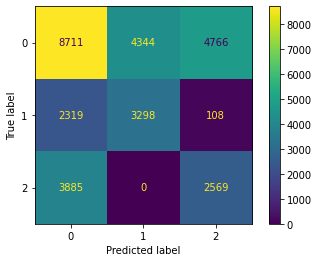

In [ ]:
print(classification_report(y_test,bnb_pred))
plot_confusion_matrix(bnb,X_test,y_test)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
logcv = LogisticRegressionCV(solver='liblinear')
logcv.fit(X_train,y_train)

LogisticRegressionCV(solver='liblinear')

In [ ]:
y_pred_tr11 = logcv.predict(X_train)
lrcv_pred = logcv.predict(X_test)

In [ ]:
lrcv_pred

array([0, 0, 2, ..., 2, 0, 0])

In [ ]:
# print the accuracy on training data and test data
print('Accuracy of LogisticRegressionCV on training set: ',accuracy_score(y_train, y_pred_tr11))
print('Accuracy of LogisticRegressionCV on test set: ',accuracy_score(y_test, lrcv_pred))

Accuracy of LogisticRegressionCV on training set:  0.9546
Accuracy of LogisticRegressionCV on test set:  0.9563333333333334


              precision    recall  f1-score   support

           0       0.95      0.97      0.96     17821
           1       0.96      0.84      0.90      5725
           2       0.96      1.00      0.98      6454

    accuracy                           0.95     30000
   macro avg       0.96      0.94      0.94     30000
weighted avg       0.95      0.95      0.95     30000



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



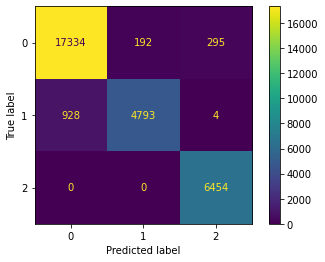

In [ ]:
print(classification_report(y_test,lr_pred))
plot_confusion_matrix(logmodel,X_test,y_test)

Hypertuning RandomForestClassifier Model

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, StratifiedKFold
kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle = True)

In [ ]:
rfc = RandomForestClassifier(random_state = 42)
# train grid search
params = {'max_depth':[5,10,15], 'n_estimators':[100,150,200]}       
rfc_grid_search = GridSearchCV(estimator = rfc, param_grid = params, cv = kfold, n_jobs=-1)
clf=rfc_grid_search.fit(X_train, y_train)

In [ ]:
print('Best Score: %.4f' % (rfc_grid_search.best_score_))
print('Best Params: %s' % (rfc_grid_search.best_params_))
print('Best Estimator: ') 
print(rfc_grid_search.best_estimator_)
print(clf)

Best Score: 0.9696
Best Params: {'max_depth': 15, 'n_estimators': 150}
Best Estimator: 
RandomForestClassifier(max_depth=15, n_estimators=150, random_state=42)
GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [100, 150, 200]})


In [ ]:
ypredicted=rfc_grid_search.predict(X_test)
score = clf.score(X_test, y_test)  
rfc_score = np.mean(score)
print('Test Accuracy : %.4f' % (rfc_score))
print('Test RFC Accuracy : ' + " {:.2f}%".format(np.mean(score) * 100))

Test Accuracy : 0.9714
Test RFC Accuracy :  97.14%


In [ ]:
print(classification_report(y_test,ypredicted))
print("RFC model accuracy_score on test:", accuracy_score(y_test, ypredicted))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17821
           1       0.96      0.89      0.93      5725
           2       1.00      1.00      1.00      6454

    accuracy                           0.97     30000
   macro avg       0.97      0.96      0.97     30000
weighted avg       0.97      0.97      0.97     30000

RFC model accuracy_score on test: 0.9713666666666667


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



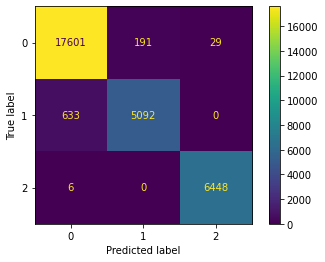

In [ ]:
plot_confusion_matrix(rfc_grid_search,X_test,y_test)